<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Deep-Neural-Network/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The first important difference that has become a de facto standard is the use of a large number of small filters. Specifically, filters with the size 3×3 and 1×1 with the stride of one, different from the large sized filters in LeNet-5 and the smaller but still relatively large filters and large stride of four in AlexNet
#The number of filters increases with the depth of the model, although starts at a relatively large number of 64 and increases through 128, 256, and 512 filters at the end of the feature extraction part of the model
#Max pooling layers are used after most, but not all, convolutional layers, learning from the example in AlexNet, yet all pooling is performed with the size 2×2 and the same stride, that too has become a de facto standard. Specifically, the VGG networks use examples of two, three, and even four convolutional layers stacked together before a max pooling layer is used. The rationale was that stacked convolutional layers with smaller filters approximate the effect of one convolutional layer with a larger sized filter, e.g. three stacked convolutional layers with 3×3 filters approximates one convolutional layer with a 7×7 filter
#VGG num of layers 
#most common VGG16, VGG19 has 3 additional convolution layers

In [4]:
# Example of creating a CNN model with many VGG blocks
from keras.models import Model
from keras.models import load_model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     147584    
                                                             

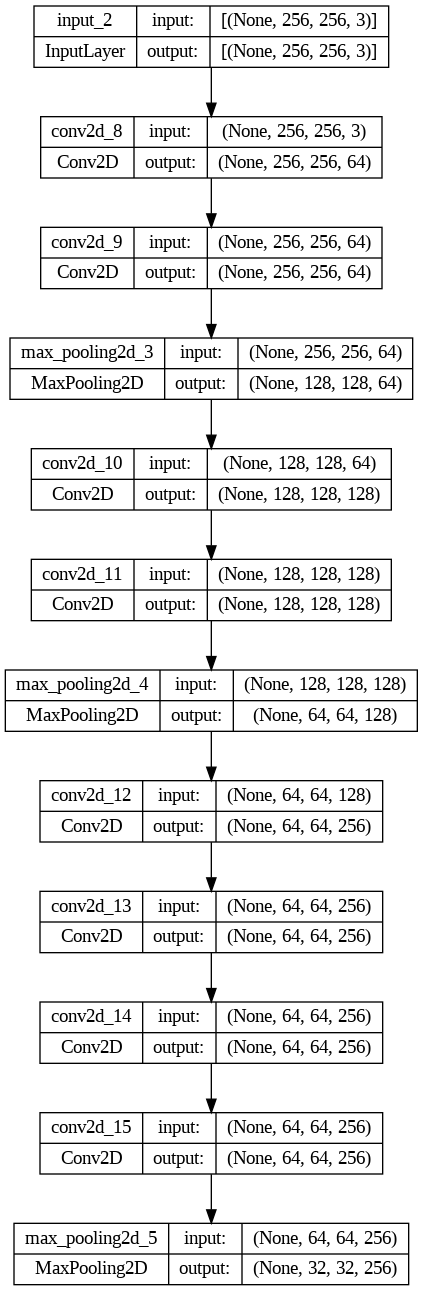

In [5]:
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
  # add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
  # add max pooling layer
  layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in

# define model input\n",
visible = Input(shape=(256, 256, 3))
# add vgg module\n",
layer = vgg_block(visible, 64, 2)
# add vgg module\n",
layer = vgg_block(layer, 128, 2)
# add vgg module\n",
layer = vgg_block(layer, 256, 4)
# create model\n",
model = Model(inputs=visible, outputs=layer)
# summarize model\n",
model.summary()
# plot model architecture\n",
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')
